In [1]:
#Logistic regression is one of the techniques used for classification problems

In [2]:
# for example 
# will customer buy life insurance ?
#   Here the classification will be YES or NO------> Binary classification 

In [3]:
# Where we have more than 2 categories its called Multiclass classification 

In [4]:
#   Which party a person is going to vote for ?
#        1.Democratic ,2.Republican, 3.Independent 

In [ ]:
      #   Sigmoid(Z) = 1/(1 + e^-z) 
    #       e= Euler's number ~ 2.71828
    # sigmoid function converts input into range 0 to 1 
    

In [6]:
# In linear regression we will be having the straight line 
  #    y=m*x+b
# the stright line we are doing it into the sigmoid function where 
#       y= 1/1+e^-(m*x+b) here i will be changing my Z into m*x+b so we are getting sigmoid curve 

In [9]:
ins=pd.read_csv("C:\\Users\\91944\\Desktop\\insurance.csv")

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
ins.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


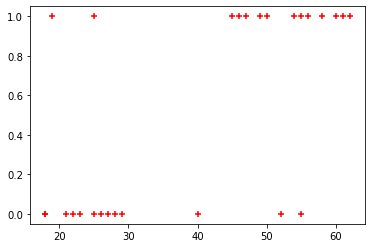

In [12]:
plt.scatter(ins.age,ins.bought_insurance,marker='+',color='red')

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(ins[['age']],ins.bought_insurance,test_size=0.1) # 10% will be using for test and 90% for train

In [32]:
x_test # these are the values which we are going to test on 

,age
11,28
4,46
10,18


In [34]:
x_train #these are the models we used to ktrain our models 

,age
2,47
21,26
12,27
9,61
19,18
22,40
26,23
18,19
6,55
13,29


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train) #now our model is redy for prediction 

LogisticRegression()

In [40]:
# from X_test we are going to make predictions

In [41]:
model.predict(x_test)

array([0, 1, 0], dtype=int64)

In [42]:
#This means to say that 1 customer and 3 rd customer are not going to buy the insu

In [51]:
model.score(x_test,y_test)  # 1.0 means our model is perfet our data set is smaller

1.0

In [52]:
model.predict_proba(x_test)

array([[0.72631204, 0.27368796],
       [0.3298399 , 0.6701601 ],
       [0.87124893, 0.12875107]])

# HR Data Analysis 

In [516]:
import numpy as np
import fancyimpute # its used for predictive mean matching method to impute the missing values we are not going to impute with mean median mode 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [517]:
import pandas as pd

In [518]:
hr=pd.read_csv("C:\\Users\\91944\\Downloads\\HR_comma_sep.csv")

In [519]:
hr.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [520]:
hr.shape

(14999, 10)

In [521]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [522]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


# Data exploration and visualization

In [523]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


In [524]:
left=hr[hr.left==1]

In [525]:
left.shape

(3571, 10)

In [526]:
retained=hr[hr.left==0]

In [527]:
retained.shape

(11428, 10)

In [528]:
#percentage of salary 

In [529]:
salary=hr[['salary','left']].groupby(['salary','left']).size().reset_index()
salary.columns = ['salary', 'left', 'count']

In [530]:
salary

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


# Average numbers for all columns

In [531]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321



From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

# Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

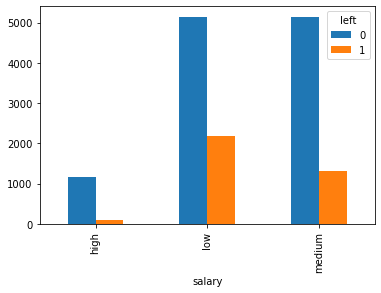

In [532]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

# This bar chat shows that employess with high salarees are not leaving the company 

# Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

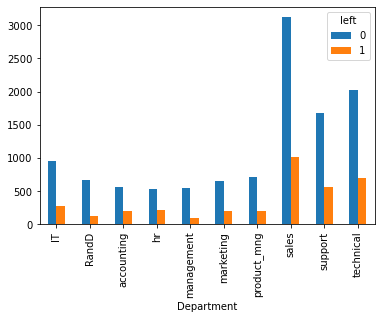

In [533]:
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

In [534]:
#**Satisfaction Level**
#**Average Monthly Hours**
#**Promotion Last 5 Years**
#**Salary**
#as independent variable
import seaborn as sns

In [535]:
corelation=hr.corr()

# 
Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects.
Evaluation score is positively correlated with spending more montly hours and number of projects.
As satisfaction level reduces, people tend to leave company

<AxesSubplot:>

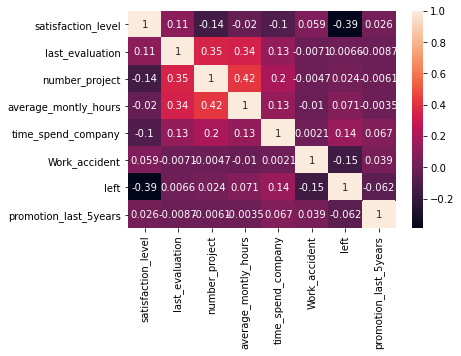

In [536]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns
           ,annot=True)

In [537]:
# satisfaction_level','average_montly_hours','promotion_last_5years' these are the values highly corelated with left

In [538]:
sl_left_mean = np.mean( hr[hr.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479516

In [539]:
np.std( hr[hr.left == 0]['satisfaction_level'] )

0.21709425554771716

In [540]:
np.mean( hr[hr.left == 1]['satisfaction_level'] )

0.44009801176140917

In [541]:
np.std( hr[hr.left == 1]['satisfaction_level'] )

0.2638964784854295

# Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
    
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying
    
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying

In [542]:
from scipy import stats

stats.ttest_ind( hr[hr.left == 1]['satisfaction_level'], hr[hr.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [543]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [544]:
hr.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [545]:
#independent variable (x)
#HR = hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
#HR.head()

In [546]:

#salary_dummies = pd.get_dummies(HR.salary, prefix="salary")

In [547]:
#hr_with_dummies = pd.concat([HR,salary_dummies],axis='columns')

In [548]:

#hr_with_dummies.head()

In [549]:
#hr_with_dummies.drop('salary',axis='columns',inplace=True)
#hr_with_dummies.head()

In [550]:
#x=hr_with_dummies

In [551]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [552]:
for c_feature in numerical_features:
  hr_df = create_dummies( hr, c_feature )

In [553]:
hr_df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10
0,0.38,0.53,2,157,0,1,0,sales,low,1,0,0,0,0,0,0


In [554]:
salary_dummies = pd.get_dummies(hr_df.salary, prefix="salary")

In [555]:
hr_with_dummies = pd.concat([hr_df,salary_dummies],axis='columns')

In [556]:
hr_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,0,1,0,sales,medium,0,0,0,1,0,0,0,0,0,1
2,0.11,0.88,7,272,0,1,0,sales,medium,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,0,1,0,sales,low,0,0,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0


In [557]:
hr_with_dummies.drop('salary',axis='columns',inplace=True)
hr_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,0,1,0,sales,0,0,0,1,0,0,0,0,0,1
2,0.11,0.88,7,272,0,1,0,sales,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,0,1,0,sales,0,0,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,0,1,0,sales,1,0,0,0,0,0,0,0,1,0


In [558]:
abi=hr_with_dummies

In [559]:
abi


,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,0,1,0,sales,0,0,0,1,0,0,0,0,0,1
2,0.11,0.88,7,272,0,1,0,sales,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,0,1,0,sales,0,0,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,0,1,0,sales,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,0,1,0,support,0,1,0,0,0,0,0,0,1,0


In [560]:
#Data set splitting

In [561]:
x=abi.columns.drop( ['left'] )

In [562]:
x=hr_df.iloc[:,:]

In [563]:
x=abi.drop('Department',axis=1)
department_job=hr_df.Department

In [564]:
x=abi.drop('left',axis=1)
left_job=hr_df.left

In [565]:
x #Independent variable



,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,Department,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0,0,sales,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,0,0,sales,0,0,0,1,0,0,0,0,0,1
2,0.11,0.88,7,272,0,0,sales,0,1,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,0,0,sales,0,0,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,0,0,sales,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,support,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,0,0,support,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,0,0,support,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,0,0,support,0,1,0,0,0,0,0,0,1,0


In [566]:
del x["Department"]

In [567]:
x.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0,0,1,0,0,0,0,0,0,0,1,0


In [568]:
y = hr_df.left



In [569]:
y.head(2) #dependent variable

0    1
1    1
Name: left, dtype: int64

In [570]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   time_spend_company_3   14999 non-null  uint8  
 7   time_spend_company_4   14999 non-null  uint8  
 8   time_spend_company_5   14999 non-null  uint8  
 9   time_spend_company_6   14999 non-null  uint8  
 10  time_spend_company_7   14999 non-null  uint8  
 11  time_spend_company_8   14999 non-null  uint8  
 12  time_spend_company_10  14999 non-null  uint8  
 13  salary_high            14999 non-null  uint8  
 14  salary_low             14999 non-null  uint8  
 15  sa

In [571]:
#x= np.array([[['satisfaction_level', 'last_evaluation', 'number_project',
         

In [572]:
Y = np.array(hr_df['left'].values.tolist())

In [573]:
x.shape

(14999, 16)

In [574]:
y.shape

(14999,)

In [575]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [576]:
logimodel=LogisticRegression()

In [577]:
logimodel.fit(x_train,y_train)

D:\Abijith\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# logi model.fit(x_train,y_train)

In [578]:
from sklearn.preprocessing import StandardScaler

In [579]:
sc=StandardScaler().fit(x_train)

In [580]:
sc_train_array=sc.transform(x_train)
sc_train=pd.DataFrame(data=sc_train_array,columns=x_train.columns)
sc_test_array=sc.transform(x_test)
sc_test=pd.DataFrame(data=sc_test_array,columns=x_test.columns)

In [581]:
logimodel.fit(sc_train,y_train)

LogisticRegression()

In [582]:
logimodel.coef_ # not the orginal coef they are all the natural log 

array([[-1.07587459,  0.07930348, -0.48247442,  0.25957811, -0.52994665,
        -0.16668066,  1.31856892,  1.04376381,  1.36064709,  0.66950591,
        -0.44029221, -0.39249997, -0.45136751, -0.35008373,  0.2079261 ,
        -0.01611006]])

In [583]:
logimodel.predict_proba()

TypeError: predict_proba() missing 1 required positional argument: 'X'

In [584]:
logimodel.intercept_

array([-2.1345573])

In [585]:
np.e**logimodel.coef_ # orginal-Co-effecient  # exponentional of all the natural log will get the orginal logrtm

array([[0.34099939, 1.0825328 , 0.61725415, 1.29638304, 0.58863638,
        0.84646988, 3.73806806, 2.83988572, 3.8987153 , 1.95327199,
        0.64384825, 0.67536637, 0.63675678, 0.70462909, 1.23112218,
        0.98401901]])

In [586]:
coeff=[0.34099939, 1.0825328 , 0.61725415, 1.29638304, 0.58863638,
        0.84646988, 3.73806806, 2.83988572, 3.8987153 , 1.95327199,
        0.64384825, 0.67536637, 0.63675678, 0.70462909, 1.23112218,
        0.98401901]

In [587]:
coeff_df=pd.DataFrame (data=coeff)

In [588]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years',
       'time_spend_company_3', 'time_spend_company_4', 'time_spend_company_5',
       'time_spend_company_6', 'time_spend_company_7', 'time_spend_company_8',
       'time_spend_company_10', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [589]:
coeff_df=pd.DataFrame(data=coeff, columns=['Estimates'],index=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years',
       'time_spend_company_3', 'time_spend_company_4', 'time_spend_company_5',
       'time_spend_company_6', 'time_spend_company_7', 'time_spend_company_8',
       'time_spend_company_10', 'salary_high', 'salary_low', 'salary_medium'])

In [590]:
coeff_df

,Estimates
satisfaction_level,0.340999
last_evaluation,1.082533
number_project,0.617254
average_montly_hours,1.296383
Work_accident,0.588636
promotion_last_5years,0.846470
time_spend_company_3,3.738068
time_spend_company_4,2.839886
time_spend_company_5,3.898715
time_spend_company_6,1.953272


In [591]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': logimodel.predict( x_test ) } )

In [592]:
hr_test_pred


,actual,predicted
1670,1,1
13378,0,1
10233,0,1
4719,0,1
7003,0,1
...,...,...
11275,0,1
3828,0,1
4645,0,1
6069,0,1


In [593]:
pred_train=logimodel.predict_proba(sc_train)
pred_test=logimodel.predict_proba(sc_test)

In [594]:
pred_train #( A will the prob of 0 and B will the prob of 1)
# since the prob of the 1st is greater so the result is 0 

array([[0.66967022, 0.33032978],
       [0.91412678, 0.08587322],
       [0.99456122, 0.00543878],
       ...,
       [0.98876939, 0.01123061],
       [0.97655784, 0.02344216],
       [0.97973069, 0.02026931]])

In [595]:
pred_test

array([[0.58574808, 0.41425192],
       [0.68037714, 0.31962286],
       [0.99323082, 0.00676918],
       ...,
       [0.89343308, 0.10656692],
       [0.98603768, 0.01396232],
       [0.06654307, 0.93345693]])

In [596]:
out_class_train=[]
for i in pred_train:
    max_values=i.max()
    pos=list(i).index(max_values)
    out_class_train.append(pos)
out_class_test=[]
for i in pred_test:
    max_values=i.max()
    pos=list(i).index(max_values)
    out_class_test.append(pos)

In [597]:
out_class_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [598]:
# Create confusion matrix

In [599]:
from sklearn.metrics import confusion_matrix

In [600]:
conf_train=confusion_matrix(out_class_train,y_train)

In [601]:
conf_train

array([[7309, 1082],
       [ 657, 1451]], dtype=int64)

In [602]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
11275    0
3828     0
4645     0
6069     0
2506     0
Name: left, Length: 4500, dtype: int64

In [603]:
conf_test=confusion_matrix(y_test,out_class_test)

In [604]:
accu_train=conf_train.diagonal().sum()/conf_train.sum()
accu_test=conf_test.diagonal().sum()/conf_test.sum()
print('Accu of train:',accu_train)
print('Accu of test:',accu_test)

Accu of train: 0.8343651776359653
Accu of test: 0.8422222222222222


In [605]:
print(classification_report (y_train,out_class_train))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7966
           1       0.69      0.57      0.63      2533

    accuracy                           0.83     10499
   macro avg       0.78      0.75      0.76     10499
weighted avg       0.83      0.83      0.83     10499



In [606]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train,out_class_train) # o.7 its a very good kappa score

0.5201227406370339

In [644]:
hr_df=pd.DataFrame()
hr_df['predicted']=out_class_train
hr_df['observed']=y_train.values
hr_df['model_class']=1

In [645]:
hr_df

,predicted,observed,model_class
0,0,0,1
1,0,0,1
2,0,1,1
3,0,0,1
4,0,0,1
...,...,...,...
10494,1,0,1
10495,0,0,1
10496,0,0,1
10497,0,0,1


In [643]:
y_train.value_counts() 

0    7966
1    2533
Name: left, dtype: int64

In [610]:
#find the confusion matrix
accuracy_score(hr_df['observed'],hr_df['no_model_class']) # its the no information rate 

0.24126107248309364

In [611]:
from sklearn.linear_model import LogisticRegression

In [612]:

from sklearn.metrics import accuracy_score 


In [613]:
accuracy_score(hr_df['observed'],hr_df['predicted']) #accuracy

0.8343651776359653

In [614]:
# no information rate is lesser than the accuracy so it is better model

In [615]:
# no we are going to find the ROC curve 

In [616]:
# roc curves mean - receiver operating characteristic curve ,curve of false positive rate against true positive rate

# X === false positive rate 
# Y === True positive rate   

In [617]:
prob_train=[]
for i in pred_train:
    max_values=i.max()
    prob_train.append(max_values)

In [618]:
import matplotlib.pyplot as plt 
from sklearn .metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(out_class_train,prob_train)
fpr

array([0.00000000e+00, 1.19175307e-04, 3.57525921e-04, ...,
       9.99880825e-01, 9.99880825e-01, 1.00000000e+00])

In [619]:
import matplotlib.pyplot as plt 
from sklearn .metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(out_class_train,prob_train)
tpr

array([0.        , 0.        , 0.        , ..., 0.99857685, 1.        ,
       1.        ])

In [620]:
#roc_curve(y_train,prob_train)
auc(fpr,tpr) #x=FPR,y=tpr

#for the different  threshold  we are going to find the AUC . under which threshold we are getting highest auc that will be our final threshold 

0.14595373827157815

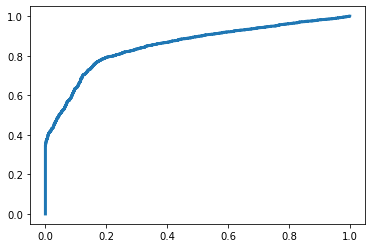

In [621]:
plt.plot(tpr,fpr,lw=3)

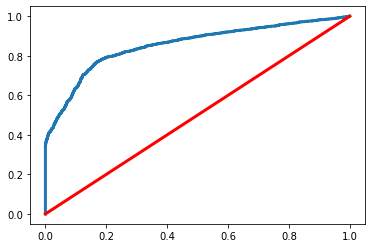

In [622]:
plt.plot(tpr,fpr,lw=3)
plt.plot([0,1],[0,1],color='red',lw=3)

In [623]:
import statsmodels.api as sm

In [627]:
logimodel=sm.Logit(y_train,sc_train).fit()

         Current function value: 0.574517
         Iterations: 35


D:\Abijith\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [625]:
y_train.reset_index(inplace=True,drop=True)

In [626]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
10494    0
10495    0
10496    0
10497    0
10498    0
Name: left, Length: 10499, dtype: int64

In [628]:
logimodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10484
Method:                           MLE   Df Model:                           14
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                -0.03979
Time:                        12:39:27   Log-Likelihood:                -6031.9
converged:                      False   LL-Null:                       -5801.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -0.7542      0.025    -29.708      0.000      -0.804      -0.704
last_evaluation           0.0259      0.025      1.049      0.294      -0.022       0.074
number_project           -0.2363      0.027     -8.772      0.000      -0.289      -0.183
average_montly_hours      0.1558      0.025      6.192      0.000       0.106       0.205
Work_accident            -0.2415      0.023    -10.553      0.000      -0.286      -0.197
promotion_last_5years    -0.0584      0.023     -2.504      0.012      -0.104      -0.013
time_spend_company_3      0.4058      0.029     13.840      0.000       0.348       0.463
time_spend_company_4      0.3653      0.029     12.726      0.000       0.309       0.422
time_spend_company_5      0.7512      0.030     25.385      0.000       0.693       0.809
time_spend_company_6      0.2355      0.023     10.108      0.000       0.190       0.281
time_spend_company_7     -0.0106      0.024     -0.437      0.662      -0.058       0.037
time_spend_company_8     -0.0029      0.024     -0.120      0.905      -0.050       0.044
time_spend_company_10    -0.0019      0.024     -0.076      0.940      -0.050       0.046
salary_high              -0.1514        nan        nan        nan         nan         nan
salary_low                0.1188        nan        nan        nan         nan         nan
salary_medium            -0.0361        nan        nan        nan         nan         nan
=========================================================================================
"""

In [629]:
logimodel.fittedvalues # this will be my odds 

0        0.499635
1       -0.564240
2       -1.663049
3       -0.168735
4       -1.308167
           ...   
10494    0.937594
10495   -0.754387
10496   -1.070051
10497   -1.127432
10498   -0.578674
Length: 10499, dtype: float64

In [630]:
pred_train=logimodel.predict(sc_train) 

In [631]:
pred_train

0        0.622374
1        0.362567
2        0.159353
3        0.457916
4        0.212794
           ...   
10494    0.718613
10495    0.319866
10496    0.255393
10497    0.244635
10498    0.359238
Length: 10499, dtype: float64

In [632]:
class_labels=[]
for i in pred_train:
    if i >0.5:
        class_labels.append (1)
    else:
        class_labels.append(0)

In [633]:
class_labels

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


In [634]:
logimodel=pd.DataFrame()
logimodel['predicted']=pred_train
logimodel['Logistic_value']=class_labels


In [635]:
logimodel

,predicted,Logistic_value
0,0.622374,1
1,0.362567,0
2,0.159353,0
3,0.457916,0
4,0.212794,0
...,...,...
10494,0.718613,1
10495,0.319866,0
10496,0.255393,0
10497,0.244635,0


Text(0.5, 15.0, 'Predicted label')

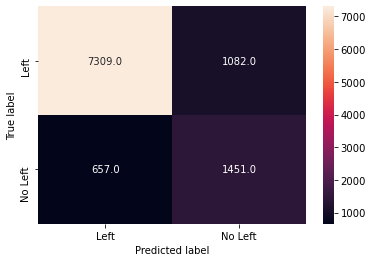

In [636]:
sns.heatmap(conf_train, annot=True,  fmt='.1f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [1]:
final=pd.DataFrame()
final['predicted_train']=pred_train
final['Trained']=B

NameError: name 'pd' is not defined

In [ ]:
diabetes.csv